#### <img src="../figs/logocimat.png" height="20%" width="20%"  align="center"/>

# <center> Ciencia de Datos<center>

<center> Víctor Muñiz Sánchez <center>
<center> Maestría en Cómputo Estadístico <center>

# Multilayer Perceptron

## Ejemplo con datos sintéticos

In [42]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn import metrics
from my_plots import *

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

Hago un grid como datos de prueba para graficar la superficie de decisión

In [43]:
num = 700
eps = X_train.std() / 2.

x_min, x_max = X_train[:, 0].min() - eps, X_train[:, 0].max() + eps
y_min, y_max = X_train[:, 1].min() - eps, X_train[:, 1].max() + eps
xx = np.linspace(x_min, x_max, num)
yy = np.linspace(y_min, y_max, num)

X1, X2 = np.meshgrid(xx, yy)
X_grid = np.c_[X1.ravel(), X2.ravel()]

Ajusto una red. Por el momento, solo controlamos el número de capas ocultas y las unidades ocultas en cada una y la regularización L2 (`weight decay`). Ver la documentación de `sklearn.neural_network.MLPClassifier`

In [57]:
# The ith element represents the number of neurons in the ith hidden layer.
hls = [35,35,25,20]
#hls = [5]
# regularización
a = 1.5
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=hls, random_state=0, alpha=a, max_iter=5000, activation = 'tanh').fit(X_train, y_train)

# predecir datos de prueba
y_test_hat = mlp.predict(X_test)
# predecir el mesh
y_hat = mlp.predict(X_grid)
Z = np.reshape(y_hat,(-1,num))
Z.shape

(700, 700)

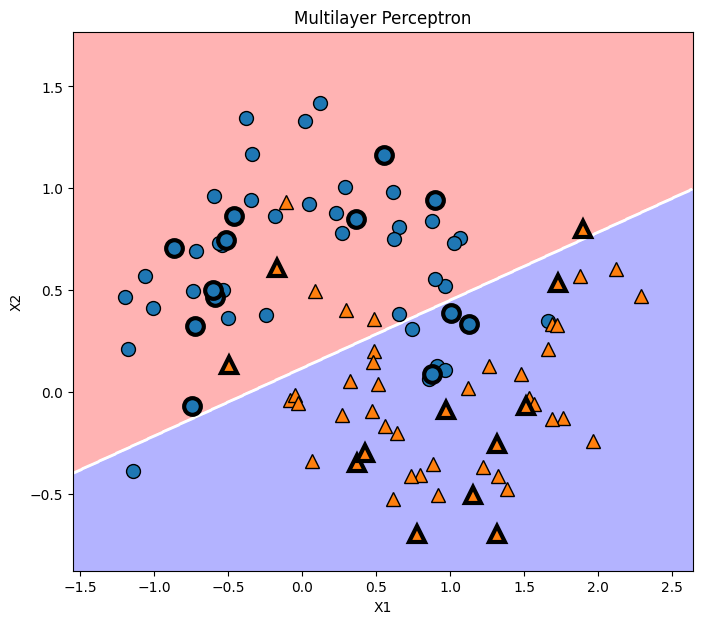

In [58]:
plt.rcParams['figure.figsize'] = (8, 7)
plt.pcolormesh(X1, X2, Z, cmap='red_blue_classes', norm=colors.Normalize(0., 1.), zorder=0)
plt.contour(X1, X2, Z, [0.5], linewidths=2., colors='white')
plt.title('Multilayer Perceptron')
plt.ylabel('X2')
plt.xlabel('X1')
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markeredgewidth=3, s = 12)
plt.show()

## Métricas

In [34]:
print(metrics.classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.75      0.86        12

    accuracy                           0.88        25
   macro avg       0.91      0.88      0.88        25
weighted avg       0.90      0.88      0.88        25



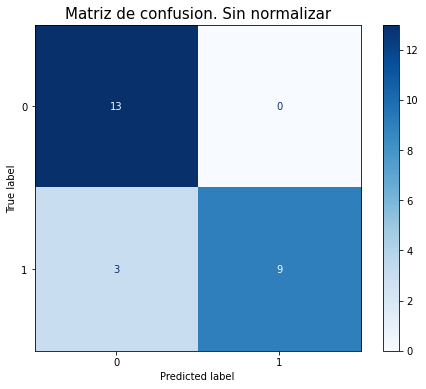

In [35]:
plt.rcParams['figure.figsize'] = (8, 6)
disp1 = metrics.plot_confusion_matrix(mlp, X_test, y_test, cmap=plt.cm.Blues)
disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
plt.show()

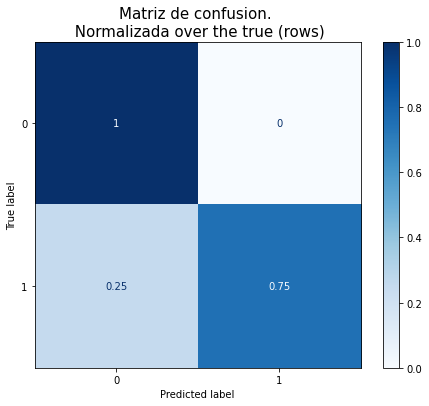

In [36]:
disp2 = metrics.plot_confusion_matrix(mlp, X_test, y_test, cmap=plt.cm.Blues, normalize = 'true')
disp2.ax_.set_title('Matriz de confusion. \n Normalizada over the true (rows)',{'fontsize':15})
plt.show()